In [3]:
import os
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import mahotas as mt

In [4]:
ds_path = "D:/skripsi/archive/hawar"


In [5]:
test_img_path = ds_path +"\\blas_1.png"
test_img_path

'D:/skripsi/archive/hawar\\blas_1.png'

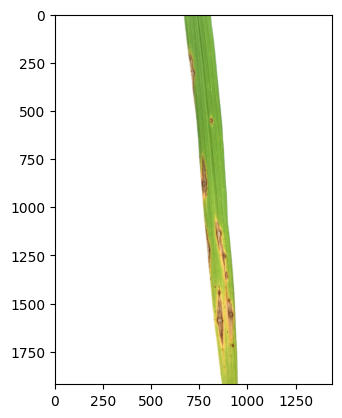

In [6]:
main_img = cv2.imread(test_img_path)
# Cek apakah gambar berhasil dibaca
if main_img is not None:
    img = cv2.cvtColor(main_img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
else:
    print("Gambar tidak dapat dibaca!")

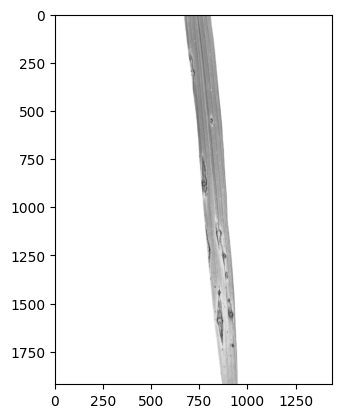

In [7]:
gs = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
plt.imshow(gs,cmap='Greys_r')

In [8]:
gs.shape

(1920, 1440)

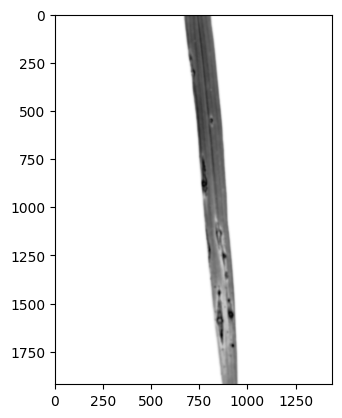

In [9]:
blur = cv2.GaussianBlur(gs, (25,25), 0)
plt.imshow(blur, cmap = 'Greys_r')

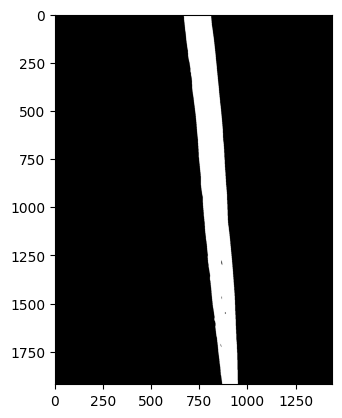

In [10]:
ret_otsu, im_bw_otsu = cv2.threshold(blur, 0 ,255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
plt.imshow(im_bw_otsu,cmap='Greys_r')

In [11]:
kernel = np.ones((50,50),np.uint8)
closing = cv2.morphologyEx(im_bw_otsu, cv2.MORPH_CLOSE, kernel)

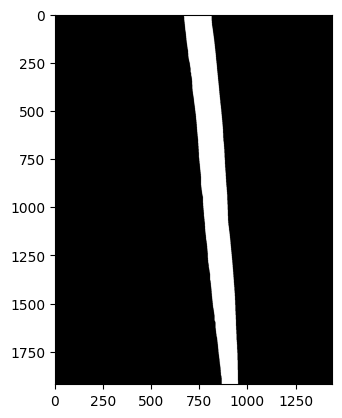

In [12]:
plt.imshow(closing,cmap='Greys_r')

In [13]:
#1. Color based features

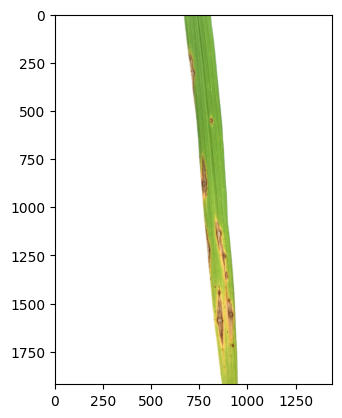

In [14]:
plt.imshow(img,cmap="Greys_r")

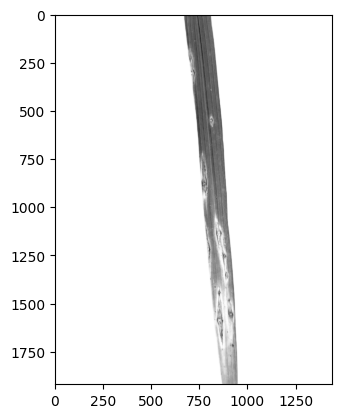

In [15]:
red_channel = img[:,:,0]
plt.imshow(red_channel,cmap="Greys_r")

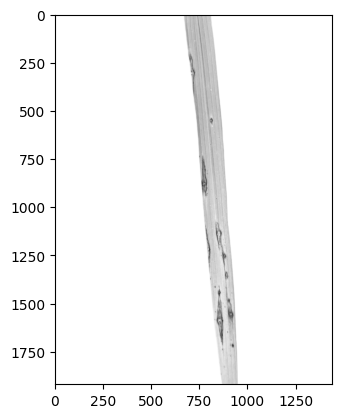

In [16]:
green_channel = img[:,:,1]
plt.imshow(green_channel,cmap="Greys_r")

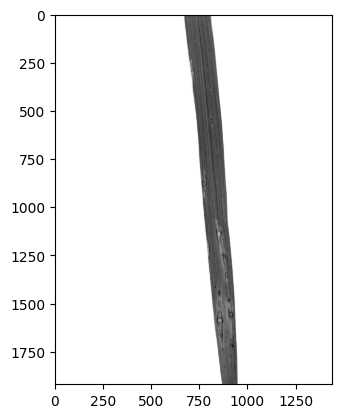

In [17]:
blue_channel = img[:,:,2]
plt.imshow(blue_channel,cmap="Greys_r")

In [18]:
np.mean(blue_channel)

239.0092310474537

In [19]:
blue_channel[blue_channel == 255] = 0
green_channel[green_channel == 255] = 0
red_channel[red_channel == 255] = 0


In [20]:
red_mean = np.mean(red_channel)
red_mean

13.787383535879629

In [21]:
green_mean = np.mean(green_channel)
green_mean

15.80065357349537

In [22]:
blue_mean = np.mean(blue_channel)
blue_mean

6.862665292245371

In [23]:
red_var = np.std(red_channel)
red_var

45.718242261270845

In [24]:
#3. Texture based features
#Using Haralick moments - calculating texture based features such as contrast, correlation, entropy

In [25]:
textures = mt.features.haralick(gs)
ht_mean = textures.mean(axis=0)
ht_mean

array([ 8.27455733e-01,  1.28476519e+01,  9.92263912e-01,  8.30255956e+02,
        9.31442039e-01,  4.92769330e+02,  3.30817617e+03,  1.13267380e+00,
        1.48759703e+00,  3.29669092e-03,  7.35421551e-01, -5.68796288e-01,
        8.29618286e-01])

In [26]:
print(ht_mean[1]) #contrast
print(ht_mean[2]) #correlation
print(ht_mean[4]) #inverse difference moments
print(ht_mean[8]) #entropy

12.847651941284413
0.9922639120302262
0.9314420387256732
1.4875970277621955
